## Importing the necessary libraries

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import re
import os

import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import wordcloud

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
os.getcwd()

'/content'

In [3]:
ROOT = '/content/drive/MyDrive/Training_courses/shapeAI/final_project'
os.chdir(ROOT)

In [4]:
os.getcwd()

'/content/drive/MyDrive/Training_courses/shapeAI/final_project'

In [8]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [46]:
# Loading our dataset which we scraped from youtube into a pandas dataframe.
df = pd.read_csv('biden_speech.csv')

In [22]:
df.head()

,Unnamed: 0,comments
0,0,He's doing great things every day guys! He's b...
1,1,"The best, most honest part of his speech was w..."
2,2,Biden: This mission was a success\nComment sec...
3,3,Biden- “my fellow Americans this war is now ov...
4,4,"13 Americans dead, and the only one fired was ..."


Let us remove the Unnamed column as it is unnecessary.

In [27]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [28]:
df.shape

(2385, 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  2384 non-null   object
dtypes: object(1)
memory usage: 18.8+ KB


We have one null value. let's drop that row.

In [30]:
df.dropna(axis=0, inplace=True)

In [31]:
df.isnull().sum()

comments    0
dtype: int64

Now our dataframe doesn't have any null values and we can start with sentiment analysis part.

In [32]:
df.head()

,comments
0,He's doing great things every day guys! He's b...
1,"The best, most honest part of his speech was w..."
2,Biden: This mission was a success\nComment sec...
3,Biden- “my fellow Americans this war is now ov...
4,"13 Americans dead, and the only one fired was ..."


In [33]:
lm = WordNetLemmatizer()

In [47]:
# Creating a function for cleaning the comments

def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',text)
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return(text) 


In [35]:
df['comments'][0:5].apply(clean)

0    great thing every day guy creating republican ...
1    best honest part speech walked without answeri...
2    biden mission success comment section like dis...
3    biden fellow american war one week later biden...
4    american dead one fired marine asking accounta...
Name: comments, dtype: object

Our function is working fine. 

In [36]:
# creating a function to get polarity and subjectivity of the comment
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [37]:
df['cleantext'] = df['comments'].apply(clean)
df['subjectivity'] = df['cleantext'].apply(get_subjectivity)
df['polarity'] = df['cleantext'].apply(get_polarity)
df['analysis'] = df['polarity'].apply(get_analysis)

In [38]:
df

,comments,cleantext,subjectivity,polarity,analysis
0,He's doing great things every day guys! He's b...,great thing every day guy creating republican ...,0.541667,0.525000,positive
1,"The best, most honest part of his speech was w...",best honest part speech walked without answeri...,0.600000,0.800000,positive
2,Biden: This mission was a success\nComment sec...,biden mission success comment section like dis...,0.000000,0.300000,positive
3,Biden- “my fellow Americans this war is now ov...,biden fellow american war one week later biden...,0.000000,0.000000,neutral
4,"13 Americans dead, and the only one fired was ...",american dead one fired marine asking accounta...,0.200000,-0.100000,negative
...,...,...,...,...,...
2379,A Democrat cleaning up another GOP mess.,democrat cleaning another gop mess,0.175000,-0.175000,negative
2380,This was the best speech by an American Presid...,best speech american president since president...,0.133333,0.141667,positive
2381,Incompetent!! Resign now and save the country.,incompetent resign save country,0.366667,-0.350000,negative
2382,This president needs to resign.,president need resign,0.000000,0.000000,neutral


In [39]:
df.analysis.value_counts(normalize=True)*100

neutral     46.098993
positive    32.382550
negative    21.518456
Name: analysis, dtype: float64

So 46 percent of the comments are neutral while 32 and 21 percent of comments are positive and negative respectively.

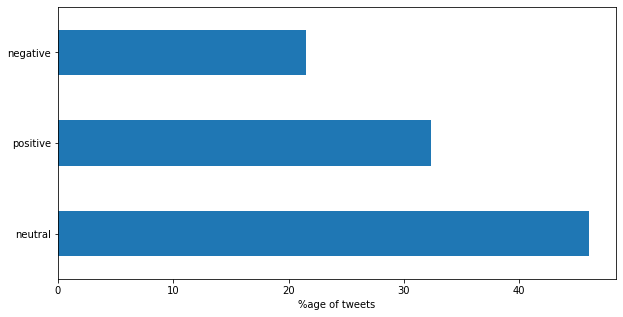

In [40]:
# Plot graph for analysis of trump tweets
plt.figure(figsize = (10,5))
(df.analysis.value_counts(normalize=True)*100).plot.barh()
plt.xlabel("%age of tweets")
plt.show()

Let us make a word cloud of the comments to get better view of most frequently used words.

In [41]:
from wordcloud import WordCloud,STOPWORDS
def word_cloud(wc_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wc_list])
    wordcloud = WordCloud(background_color = 'Black',
                        stopwords = stopwords,
                        width = 1600,
                        height = 800,
                        random_state = 42,
                        colormap = 'jet',
                        max_words = 200,
                        max_font_size =200).generate(all_words)
    plt.figure(figsize =(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)


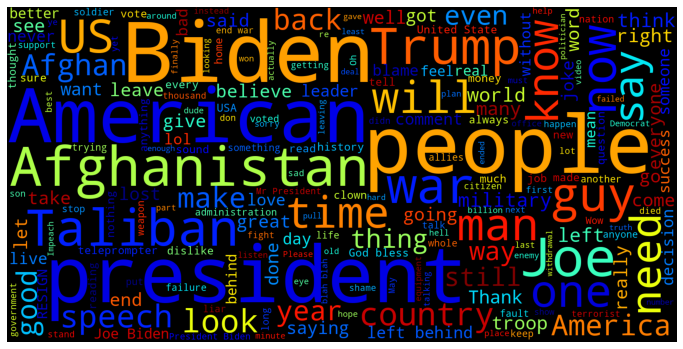

In [43]:
word_cloud(df['comments'])

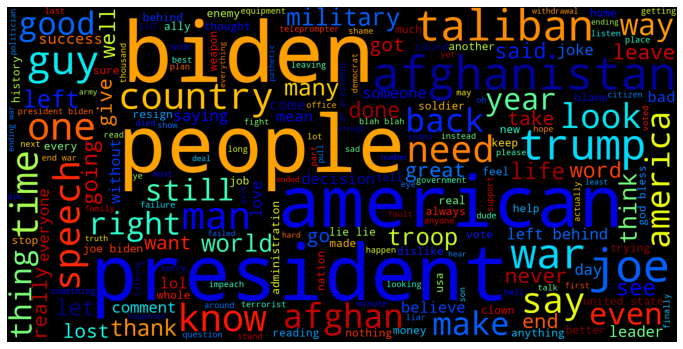

In [45]:
word_cloud(df['cleantext'])